In [1]:
%autosave 0

Autosave disabled


# 项目案例1: 优化约会网站的配对效果
## KNN

In [2]:
from __future__ import print_function
from numpy import *
import operator
from os import listdir
from collections import Counter

In [3]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    
    sortedDistIndicies = distances.argsort()
    
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
#     sortedClassCount = sorted(classCount.iteritems(),
#                              key=operator.itemgetter(1),
#                              reverse=True)
#     return sortedClassCount[0][0]
    maxClassCount = max(classCount, key=classCount.get)
    return maxClassCount

def test1():
    group, labels = createDataSet()
    print(str(group))
    print(str(labels))
    print(classify0([0.1,0.1], group, labels, 3))
    
def file2matrix(filename):
    fr = open(filename)
    
    numberOfLines = len(fr.readlines())
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    fr = open(filename)
    index = 0
    
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    
    return returnMat, classLabelVector

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    
    return normDataSet, ranges, minVals



def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    print('numTestVecs = ',numTestVecs)
    
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],
                                    normMat[numTestVecs:m,:],
                                    datingLabels[numTestVecs:m],
                                    3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)
    

    
    
def classifyPerson():
    resultList = ['not at all',
                 'in small doses',
                 'in large doses']
    percentTats = float(raw_input("percentage of time spent playing video games ?"))
    ffMiles = float(raw_input("frequent filer miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,
                                normMat,
                                datingLabels,
                                3)
    print("You will probably like this person: ",resultList[classifierResult-1])

In [10]:
if __name__ == '__main__':
#     test1()
    datingClassTest()

numTestVecs =  100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with

In [ ]:
# knn手写数字识别
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir()

In [3]:
i = 1

In [4]:
type(i)

int

In [5]:
print("i=",i)

i= 1


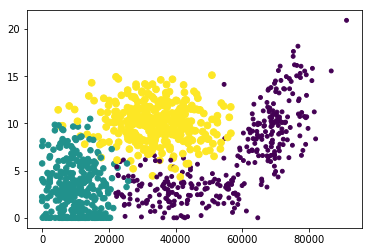

In [6]:
import matplotlib
import matplotlib.pyplot as plt

datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],
          datingDataMat[:,1],
          15.0*array(datingLabels),
          15.0*array(datingLabels))
plt.show()

In [9]:
datingDataMat[:,0]

array([40920., 14488., 26052., 75136., 38344., 72993., 35948., 42666.,
       67497., 35483., 50242., 63275.,  5569., 51052., 77372., 43673.,
       61364., 69673., 15669., 28488.,  6487., 37708., 22620., 28782.,
       19739., 36788.,  5741., 28567.,  6808., 41611., 36661., 43605.,
       15360., 63796., 10743., 70808., 72011.,  5914., 14851., 33553.,
       44952., 17934., 27738., 29290., 42330., 36429., 39623., 32404.,
       27268.,  5477., 14254., 68613., 41539.,  7917., 21331.,  8338.,
        5176., 18983., 68837., 13438., 48849., 12285.,  7826.,  5565.,
       10346.,  1823.,  9744., 16857., 39336., 65230.,  2463., 27353.,
       16191., 12258., 42377., 25607., 77450., 58732., 46426., 32688.,
       64890.,  8554., 28861., 42050., 32193., 64895.,  2355.,     0.,
       70406., 57399., 41732., 11429., 75270.,  5459., 73520., 40279.,
       21540., 17694., 22329., 46570., 42403., 33654.,  9171., 28122.,
       34095.,  1774., 40131., 13994., 77064., 11210.,  6122., 15341.,
      

In [10]:
datingDataMat[:,1]

array([8.3269760e+00, 7.1534690e+00, 1.4418710e+00, 1.3147394e+01,
       1.6697880e+00, 1.0141740e+01, 6.8307920e+00, 1.3276369e+01,
       8.6315770e+00, 1.2273169e+01, 3.7234980e+00, 8.3858790e+00,
       4.8754350e+00, 4.6800980e+00, 1.5299570e+01, 1.8894610e+00,
       7.5167540e+00, 1.4239195e+01, 0.0000000e+00, 1.0528555e+01,
       3.5402650e+00, 2.9915510e+00, 5.2978650e+00, 6.5938030e+00,
       2.8167600e+00, 1.2458258e+01, 0.0000000e+00, 9.9686480e+00,
       1.3648380e+00, 2.3045300e-01, 1.1865402e+01, 1.2046000e-01,
       8.5452040e+00, 5.8566490e+00, 9.6656180e+00, 9.7787630e+00,
       4.9329760e+00, 2.2162460e+00, 1.4305636e+01, 1.2591889e+01,
       3.4246490e+00, 0.0000000e+00, 8.5338230e+00, 9.8295280e+00,
       1.1492186e+01, 3.5709680e+00, 1.7712280e+00, 3.5139210e+00,
       4.3981720e+00, 4.2768230e+00, 5.9460140e+00, 1.3798970e+01,
       1.0393591e+01, 3.0075770e+00, 1.0319380e+00, 4.7512120e+00,
       3.6922690e+00, 1.0448091e+01, 1.0585786e+01, 1.6045010e

In [11]:
datingLabels

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
